# Librerias

In [3]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
from joblib import dump # para guardar nuestro modelo

<a href='https://www.kaggle.com/competitions/titanic/data?select=test.csv'>Link al Dataset</a>

In [6]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

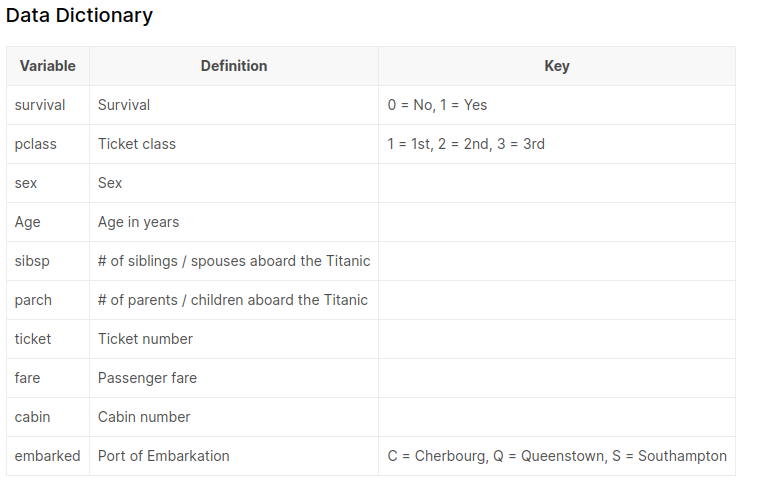

In [5]:
df.duplicated().sum()

0

Reacomodamos

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [80]:
sorted(df.Pclass.unique())

[1, 2, 3]

In [9]:
df.Pclass.unique()


array([3, 1, 2], dtype=int64)

Guardamos nuestro df

In [78]:
dump(df, 'datos.df')

['datos.df']

<div class="alert alert-success h2" role="alert">
    <b>Preprocesado</b>
</div>

<Figure size 800x500 with 0 Axes>

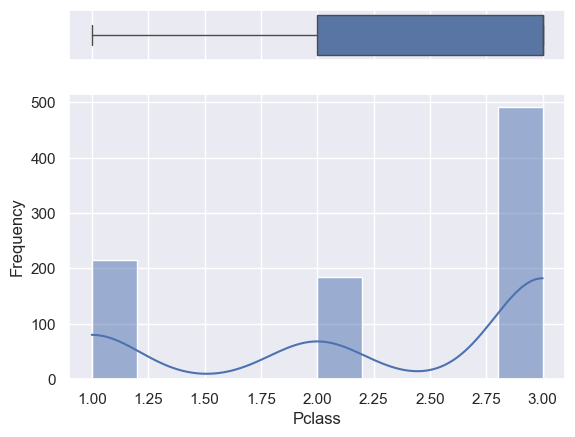

<Figure size 800x500 with 0 Axes>

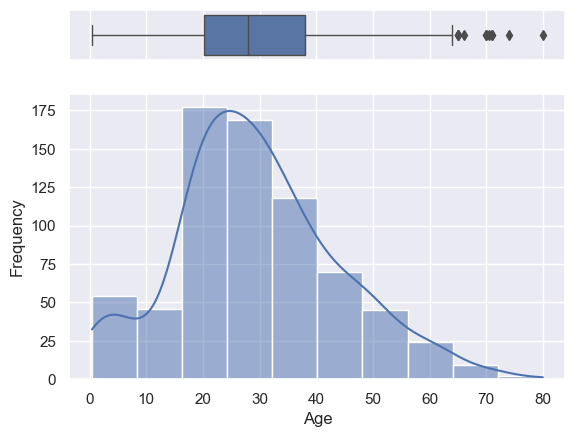

<Figure size 800x500 with 0 Axes>

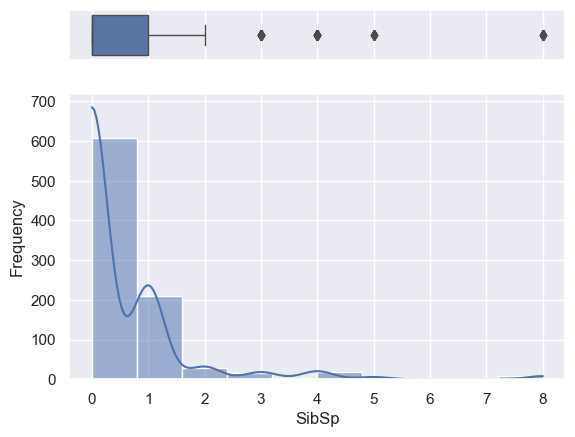

<Figure size 800x500 with 0 Axes>

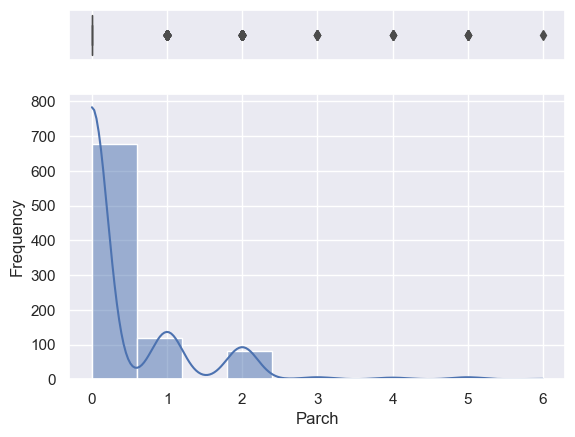

<Figure size 800x500 with 0 Axes>

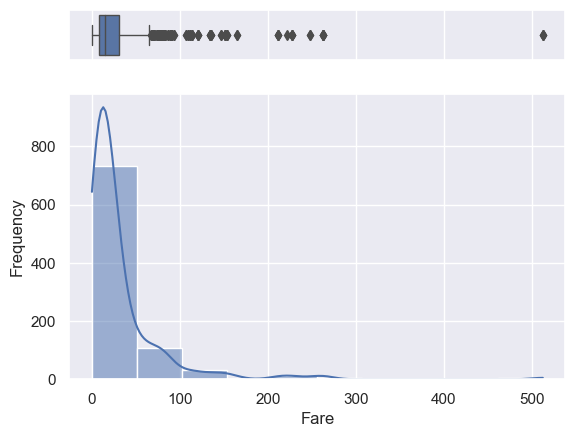

<Figure size 800x500 with 0 Axes>

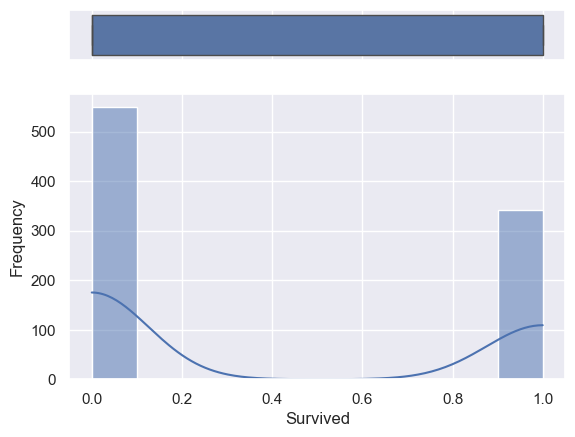

In [8]:
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

for i in columns:
    plt.figure(figsize=(8, 5))
    sns.set()
    
    # Filtra los valores no nulos en la columna actual
    filtered_data = df[df[i].notna()]
    
    # Crea un subplot con dos áreas (boxplot y histograma)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Dibuja el boxplot en la parte superior en posición horizontal
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    
    # Dibuja el histograma en la parte inferior
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    # Añade títulos a los subplots
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel= i,ylabel='Frequency')



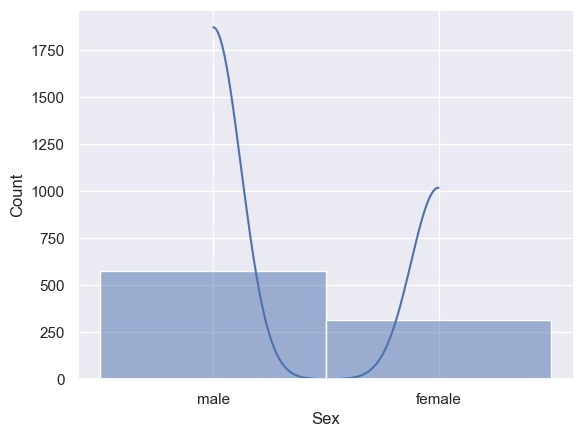

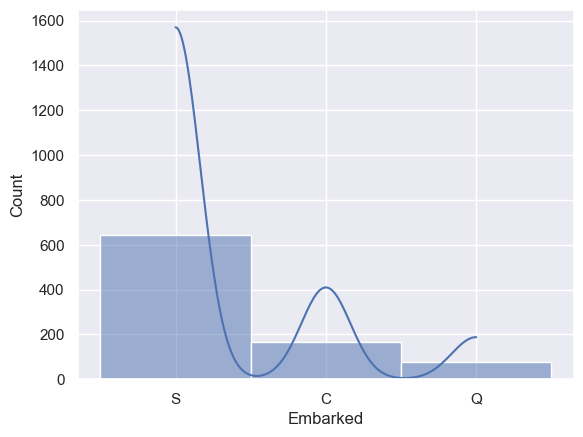

In [9]:
for i in df[['Sex', 'Embarked']]:
    plt.figure()
    sns.histplot(df[i] , bins = 10,kde=True)

# Transformaciones

<div class="alert alert-warning" role="alert">
    <h3>Variables numéricas</h3>
    Ya vimos que no son normales, separamos en outlier y no outliers
</div>

In [10]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('robust', RobustScaler())
    ]
)

numeric_features_minmax = ['Pclass']
numeric_transformer_minmax = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('minmax', MinMaxScaler())
    ]
)

<div class="alert alert-warning" role="alert">
    <h3>Variables categóricas</h3>
    Sex en binaria y OneHotEncoder para Embarked
</div>

In [11]:
categorical_features_bin = ['Sex']
categorical_transformer_bin = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = -1)), #sustituyo nan por -1
        ('ordinalEncoder', OrdinalEncoder())
    ]
)

categorical_features = ['Embarked']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(sparse=False))
    ]
)

<div class="alert alert-warning" role="alert">
    <h3>Pipeline</h3>
    Una vegada creada totes les pipelines, utilitzem ColumnTransformer per utilitzar a cada una de les variables escollides
</div>

In [12]:
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('categorical_bin', categorical_transformer_bin, categorical_features_bin),
        ('numericals', numeric_transformer, numeric_features),
        ('numericals_minmax', numeric_transformer_minmax, numeric_features_minmax) 
    ],
    remainder = 'drop'
)
# con remainder eliminamos las columnas que no estan especificas

<div class="alert alert-success" role="alert">
    <b class="h2">Modelos</b>
    <p>Utilitzaremos pipeline</p>
</div>

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
X = df.drop('Survived', axis = 1)
y = df.Survived

In [15]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
860,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
435,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S


In [18]:
rfc = RandomForestClassifier(random_state = 42)
## Pipeline
pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('model', rfc)
        ])

In [19]:
pipeline.fit(X_train, y_train)
print('R2 score: {0:.2f}'.format(pipeline.score(X_test, y_test)))

R2 score: 0.82


In [20]:
pipeline.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [21]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoricals',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Embarked']),
                                                 ('categorical_bin',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant')),
                                                                  ('ordinalEncoder',
                                                                   OrdinalEncoder())]),
                                                  ['Sex']),
                                                 ('numericals',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('numericals_minmax',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Pclass'])])),
                ('model', RandomForestClassifier(random_state=42))])

<div class="alert alert-warning" role="alert">
    <h1>Buscando el mejor modelo con parámetros por defecto</h1>
</div>

In [22]:
lda = LinearDiscriminantAnalysis()
knc = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state = 42)
svc = SVC(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
lr = LogisticRegression()

In [23]:
evaluation = pd.DataFrame({'model':['lda','knc','gnb','dtc','svc','rfc','lr']})

In [24]:
from sklearn.model_selection import cross_val_score

models = [lda, knc, gnb, dtc, svc, rfc, lr]
score_mean = []
score_std = []

for model in models:
    pipeline = Pipeline(
        [
            ('preprocessing', preprocessor),
            ('model', model)
        ]
    )
    score = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
    score_mean.append(score.mean())
    score_std.append(score.std())

In [25]:
evaluation['f1_cv'] = score_mean
evaluation['f1_std_cv'] = score_std
evaluation

,model,f1_cv,f1_std_cv
0,lda,0.715874,0.029714
1,knc,0.719943,0.032128
2,gnb,0.690209,0.079464
3,dtc,0.697299,0.044114
4,svc,0.751038,0.024571
5,rfc,0.748667,0.037896
6,lr,0.712778,0.024799


Los 3 mejores modelos los seleccionamos para buscar sus mejores hiperparametros

In [40]:
pipeline_SVC = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('model', SVC(verbose=False))
    ]
)

params_SVC = {
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'model__gamma': ['scale', 'auto'],
    'model__decision_function_shape': ['ovo', 'ovr'],
    'model__verbose': [True, False],
    'model__shrinking': [True, False],
    'model__probability': [True, False],
    'model__C': [0.01, 0.1, 0.5, 1, 2, 10, 100],
    'model__random_state': [42]
}

#rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42)

gs_SVC = GridSearchCV(pipeline_SVC, params_SVC, cv = 5, scoring = ['f1', 'accuracy'], refit = 'f1', n_jobs = -1)

gs_SVC.fit(X, y)

print(f'Best F1-score: {gs_SVC.best_score_:.3f}\n')
print(f'Best parameter set: {gs_SVC.best_params_}\n')
print(f'Scores: {classification_report(y, gs_SVC.predict(X))}')

[LibSVM]Best F1-score: 0.753

Best parameter set: {'model__C': 2, 'model__decision_function_shape': 'ovo', 'model__gamma': 'scale', 'model__kernel': 'rbf', 'model__probability': True, 'model__random_state': 42, 'model__shrinking': True, 'model__verbose': True}

Scores:               precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.82      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



In [29]:
best_model_SVC = gs_SVC.best_estimator_
best_model_SVC

In [42]:
pipeline_RF = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('model', RandomForestClassifier())
    ]
)

params_RF = {
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__max_features': ['sqrt', 'log2', None],
    'model__bootstrap': [True, False],
    'model__class_weight': ['balanced', 'balanced_subsample', None],
    'model__random_state': [42]
}

#rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42)

gs_RF = GridSearchCV(pipeline_RF, params_RF, cv = 5, scoring = ['f1', 'accuracy'], refit = 'f1', n_jobs = -1)

gs_RF.fit(X, y)

best_model_RF = gs_RF.best_estimator_

print(f'Best F1-score: {gs_RF.best_score_:.3f}\n')
print(f'Best parameter set: {gs_RF.best_params_}\n')
print(f'Scores: {classification_report(y, gs_RF.predict(X))}')

Best F1-score: 0.757

Best parameter set: {'model__bootstrap': True, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_features': None, 'model__random_state': 42}

Scores:               precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [44]:
pipeline_LR = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('model', LogisticRegression())
    ]
)

params_LR = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__dual': [True, False],
    'model__C': [0.01, 0.1, 0.5, 1, 2, 10, 100],
    'model__fit_intercept': [True, False],
    'model__class_weight': [None, 'balanced'],
    'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'model__multi_class': ['auto', 'ovr', 'multinomial'],
    'model__warm_start': [True, False],
    'model__random_state': [42]
}

#rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42)

gs_LR = GridSearchCV(pipeline_LR, params_LR, cv = 5, scoring = ['f1', 'accuracy'], refit = 'f1', n_jobs = -1)

gs_LR.fit(X, y)

best_model_LR = gs_LR.best_estimator_

print(f'Best F1-score: {gs_LR.best_score_:.3f}\n')
print(f'Best parameter set: {gs_LR.best_params_}\n')
print(f'Scores: {classification_report(y, gs_LR.predict(X))}')

Best F1-score: 0.726

Best parameter set: {'model__C': 10, 'model__class_weight': 'balanced', 'model__dual': True, 'model__fit_intercept': True, 'model__multi_class': 'auto', 'model__penalty': 'l2', 'model__random_state': 42, 'model__solver': 'liblinear', 'model__warm_start': True}

Scores:               precision    recall  f1-score   support

           0       0.84      0.81      0.83       549
           1       0.71      0.75      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



Seleccionamos nuestro mejor modelo

In [45]:
df_scores = pd.DataFrame({
    'Modelo':['SVC', 'RF', 'LR'],
    'Score': [gs_SVC.best_score_, gs_RF.best_score_, gs_LR.best_score_]
})
df_scores

,Modelo,Score
0,SVC,0.752805
1,RF,0.756608
2,LR,0.726497


Accuracy score: 0.80


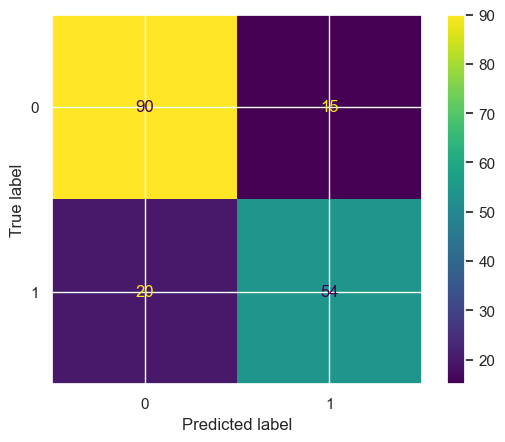

In [46]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model_RF.fit(X_train, y_train)
print('Accuracy score: {0:.2f}'.format(best_model_RF.score(X_test, y_test)))

y_pred = best_model_RF.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

<div class="alert alert-success" role="alert">
    <b class="h2">Mejoras del modelo</b>
</div>

In [47]:
score = cross_val_score(best_model_RF, X, y, cv=5, scoring='f1')
print('F1 score: {0:.2f}'.format(score.mean()))

F1 score: 0.76


<div class="alert alert-warning h3" role="alert">PCA
</div>

Para poderlo usar en el pipeline necesitamos extraer el componente 'model' del mejor estimador obtenido durante la búsqueda en cuadrícula

In [55]:
best_model = best_model_RF.named_steps['model']

In [56]:
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('pca', PCA(0.99)),
        ('model', best_model)
    ]
)

score = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print('F1 score: {0:.2f}'.format(score.mean()))

F1 score: 0.71


Sigue estando mejor sin el PCA

<div class="alert alert-warning h3" role="alert">SMOTE <a href='https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html'>Sklearn</a>
</div>

El objetivo de SMOTE es mejorar la capacidad de generalización de los modelos al proporcionar más ejemplos de la clase minoritaria, lo que ayuda a prevenir el sobreajuste a la clase mayoritaria y mejora el rendimiento en la clasificación de la clase minoritaria.

In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', best_model)
    ]
)

score = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print('F1 score: {0:.2f}'.format(score.mean()))

F1 score: 0.74


Sigue estando mejor sin el SMOTE

In [58]:
best_model_RF

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoricals',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Embarked']),
                                                 ('categorical_bin',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant')),
                                                                  ('ordinalEncoder',
                                                                   OrdinalEncoder())]),
                                                  ['Sex']),
                                                 ('numericals',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('numericals_minmax',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Pclass'])])),
                ('model',
                 RandomForestClassifier(max_features=None, random_state=42))])

Nueva predicción:

In [70]:
X_new = pd.DataFrame([[710, 3, 'Moubarek, Master. Halim Gonios ("William George")', 'male', 40, 1, 1, 2661, 15.2458, ' ', 'C']],
                     columns= ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

y_new = best_model_RF.predict(X_new)
y_new

array([0], dtype=int64)

Guardamos nuestro mejor modelo entrenado para poder utilizarlo y el preprocesador

In [72]:
dump(best_model_RF, 'best_model.joblib')

['best_model.joblib']

In [8]:
df.PassengerId.max()

891